In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plote
from sklearn import preprocessing
from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading the dataset

In [2]:
# Reading the dataset
file = pd.ExcelFile("../input/research_student (1).xlsx")
dataset = file.parse('Sheet1', header=0)

## Dataset head

In [3]:
# Displaying the first 5 rows of dataset
dataset.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,...,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIVIL,77.57,64.6,Male,BSEB Patna,BSEB Patna,OBC,6.29,44718.0,15.970714,...,5.94,5.41,6.25,6.13,1.0,4.0,3.0,2.0,0.0,5.0
2,CSE,86.40,71.8,Male,CBSE,CBSE,GEN,6.47,24222.0,8.650714,...,5.88,5.53,6.44,6.19,2.0,2.0,0.0,1.0,0.0,4.0
3,CSE,88.14,78.0,Male,ICSE,ICSE,GEN,7.35,24723.0,8.829643,...,6.54,6.41,6.50,6.69,1.0,1.0,3.0,0.0,0.0,5.0
4,CSE,65.40,59.8,Female,CBSE,CBSE,ST,6.41,232157.0,82.913214,...,5.71,5.24,5.88,6.25,2.0,0.0,2.0,2.0,0.0,1.0


## Removing outliers

In [4]:
dataset = dataset.drop(dataset[dataset['GPA 2']>10].index)

In [5]:
# dropping the NaN values and separating the dependent and independent variables
dataset = dataset.dropna()
target = dataset.CGPA
features = dataset.drop(['CGPA'], axis = 1)

## Heat Map

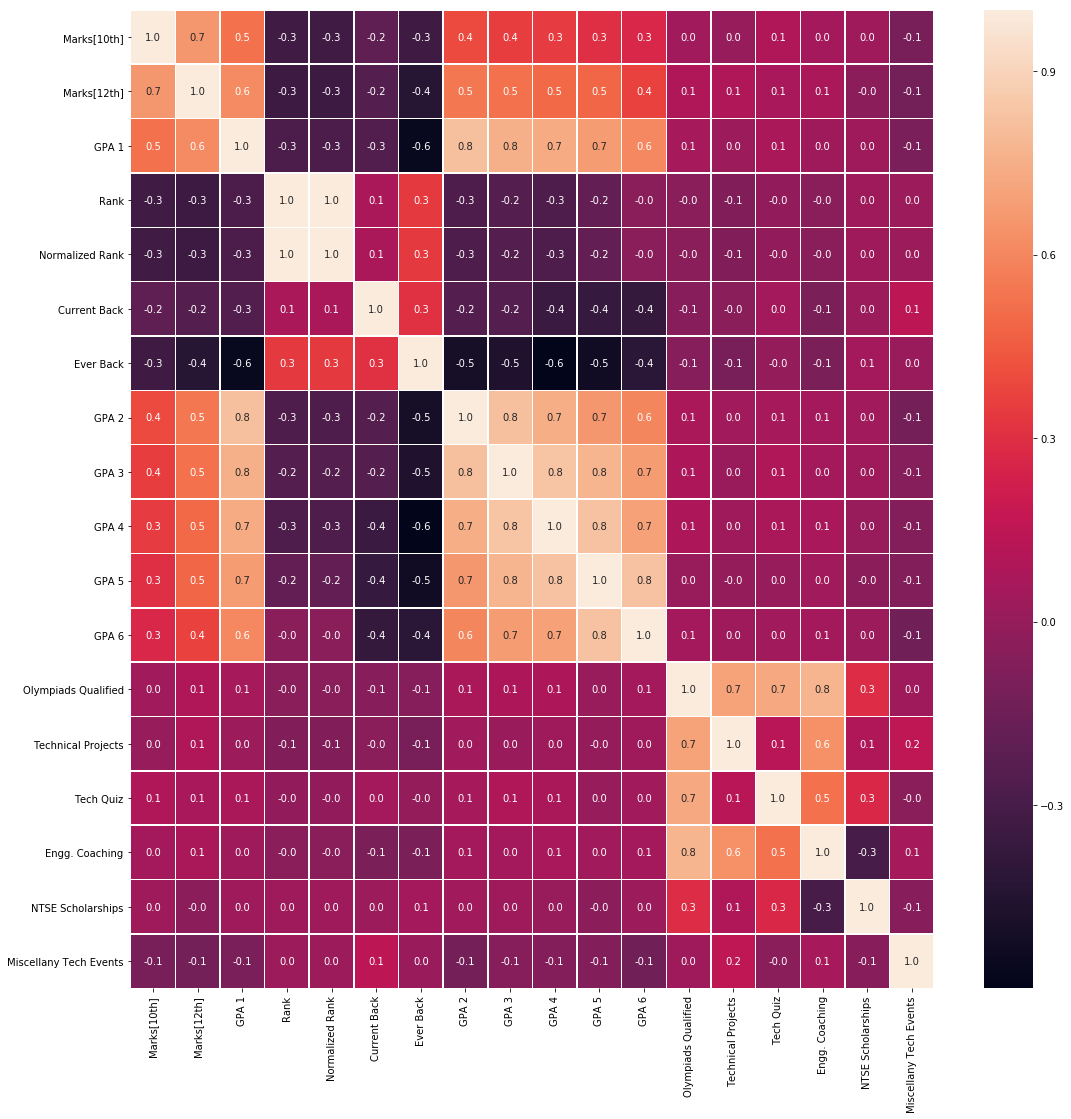

In [6]:
f,ax = plote.subplots(figsize=(18, 18))
sns.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [7]:
# dropping 'Rank' features as the dataset has already Normalised Rank feature
features = features.drop(['Rank'], axis=1)

In [8]:
features.iloc[:,0:14].describe()

,Marks[10th],Marks[12th],GPA 1,Normalized Rank,Current Back,Ever Back,GPA 2,GPA 3,GPA 4
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,84.294679,77.838119,7.231147,14.679875,0.073394,1.440367,6.974908,6.905321,6.991569
std,8.541319,9.027970,0.700450,12.565192,0.261383,2.663739,0.704570,0.750704,0.766016
min,53.700000,56.800000,5.760000,4.219286,0.000000,0.000000,5.760000,4.880000,4.900000
25%,79.000000,71.650000,6.710000,8.526161,0.000000,0.000000,6.432500,6.327500,6.455000
50%,86.550000,79.100000,7.180000,10.580714,0.000000,0.000000,6.880000,6.820000,6.955000
75%,91.000000,85.350000,7.747500,14.675179,0.000000,2.000000,7.470000,7.407500,7.470000
max,96.600000,96.500000,9.120000,99.942500,1.000000,13.000000,9.350000,9.120000,9.180000


In [9]:
features.iloc[:,14:].describe()

,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,7.558360,7.563911,3.591743,1.857798,1.830275,2.963303,0.692661,1.472477
std,0.961291,0.954523,2.106240,1.378892,1.385774,2.060945,1.341311,2.200057
min,5.500000,4.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.810000,6.872500,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,7.630000,7.500000,4.000000,2.000000,2.000000,3.000000,0.000000,0.000000
75%,8.250000,8.190000,5.000000,3.000000,3.000000,4.000000,1.000000,4.000000
max,9.500000,9.810000,10.000000,5.000000,7.000000,10.000000,7.000000,5.000000


## Preprocessing Dataset

In [10]:
obj_features = features.loc[:, features.dtypes == np.object]
obj_features_columns = obj_features.columns
features[obj_features_columns] = features[obj_features_columns].apply(preprocessing.LabelEncoder().fit_transform)

In [11]:
list1 = []
for item in features.columns:
    item = item.replace("[","")
    item = item.replace("]","")
    list1.append(item)
    
features.columns = list1

## Test Train Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target ,test_size=0.3, random_state=7)

## Extreme Gradient Boosting regression

In [13]:
xgb = xgb.XGBRegressor()

In [14]:
xgb.fit(X_train,y_train)
predictions_xgb = xgb.predict(X_test)

In [15]:
error_xgb = metrics.mean_squared_error(y_test, predictions_xgb)
print(error_xgb)

0.0136835156595


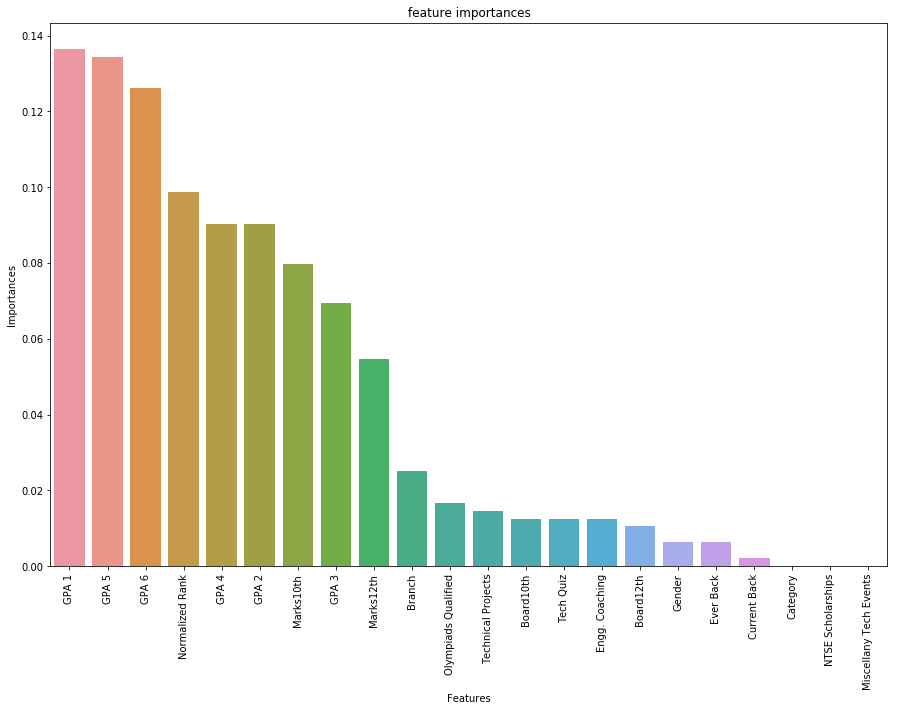

In [16]:
importances = xgb.feature_importances_
feature_names = features.columns.values
data = pd.DataFrame({'features': feature_names,'importances':importances})
new_index = (data['importances'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
plt.figure(figsize=(15,10))
ax= sns.barplot(x=sorted_data['features'], y=sorted_data['importances'])
plt.xticks(rotation= 90)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('feature importances')
plt.show()

### Conclusion
The above plot shows that **Gender, Category **and** Extra Curricular** activities have less impact on CGPA.

## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predictions_lr = clf.predict(X_test)

In [18]:
error_lr = metrics.mean_squared_error(y_test, predictions_lr)
print(error_lr)

0.0115793611054


## Neural Network

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=22, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, batch_size = 4, nb_epoch = 1000)

pred_nn = model.predict(X_test)

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/Keras-2.1.3-py3.6.egg/keras/models.py:945: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1000
152/152 [==============================] - 0s 1ms/step - loss: 17.1864
Epoch 2/1000
152/152 [==============================] - 0s 298us/step - loss: 0.7379
Epoch 3/1000
152/152 [==============================] - 0s 297us/step - loss: 0.4811
Epoch 4/1000
152/152 [==============================] - 0s 266us/step - loss: 0.4514
Epoch 5/1000
152/152 [==============================] - 0s 281us/step - loss: 0.4307
Epoch 6/1000
152/152 [==============================] - 0s 291us/step - loss: 0.4107
Epoch 7/1000
152/152 [==============================] - 0s 277us/step - loss: 0.3849
Epoch 8/1000
152/152 [==============================] - 0s 282us/step - loss: 0.3769
Epoch 9/1000
152/152 [==============================] - 0s 267us/step - loss: 0.3641
Epoch 10/1000
152/152 [==============================] - 0s 287us/step - loss: 0.3382
Epoch 11/1000
152/152 [==============================] - 0s 291us/step - loss: 0.3419
Epoch 12/1000
152/152 [==============================] - 0s 290u

152/152 [==============================] - 0s 323us/step - loss: 0.0073
Epoch 191/1000
152/152 [==============================] - 0s 357us/step - loss: 0.0066
Epoch 192/1000
152/152 [==============================] - 0s 418us/step - loss: 0.0065
Epoch 193/1000
152/152 [==============================] - 0s 317us/step - loss: 0.0067
Epoch 194/1000
152/152 [==============================] - 0s 323us/step - loss: 0.0079
Epoch 195/1000
152/152 [==============================] - 0s 346us/step - loss: 0.0067
Epoch 196/1000
152/152 [==============================] - 0s 326us/step - loss: 0.0103
Epoch 197/1000
152/152 [==============================] - 0s 325us/step - loss: 0.0084
Epoch 198/1000
152/152 [==============================] - 0s 344us/step - loss: 0.0092
Epoch 199/1000
152/152 [==============================] - 0s 328us/step - loss: 0.0072
Epoch 200/1000
152/152 [==============================] - 0s 331us/step - loss: 0.0107
Epoch 201/1000
152/152 [==============================] - 

152/152 [==============================] - 0s 315us/step - loss: 0.0076
Epoch 379/1000
152/152 [==============================] - 0s 321us/step - loss: 0.0075
Epoch 380/1000
152/152 [==============================] - 0s 301us/step - loss: 0.0081
Epoch 381/1000
152/152 [==============================] - 0s 325us/step - loss: 0.0088
Epoch 382/1000
152/152 [==============================] - 0s 334us/step - loss: 0.0060
Epoch 383/1000
152/152 [==============================] - 0s 355us/step - loss: 0.0081
Epoch 384/1000
152/152 [==============================] - 0s 306us/step - loss: 0.0081
Epoch 385/1000
152/152 [==============================] - 0s 345us/step - loss: 0.0055
Epoch 386/1000
152/152 [==============================] - 0s 343us/step - loss: 0.0060
Epoch 387/1000
152/152 [==============================] - 0s 301us/step - loss: 0.0081
Epoch 388/1000
152/152 [==============================] - 0s 324us/step - loss: 0.0106
Epoch 389/1000
152/152 [==============================] - 

152/152 [==============================] - 0s 335us/step - loss: 0.0079
Epoch 567/1000
152/152 [==============================] - 0s 328us/step - loss: 0.0064
Epoch 568/1000
152/152 [==============================] - 0s 316us/step - loss: 0.0110
Epoch 569/1000
152/152 [==============================] - 0s 358us/step - loss: 0.0119
Epoch 570/1000
152/152 [==============================] - 0s 318us/step - loss: 0.0110
Epoch 571/1000
152/152 [==============================] - 0s 371us/step - loss: 0.0064
Epoch 572/1000
152/152 [==============================] - 0s 289us/step - loss: 0.0071
Epoch 573/1000
152/152 [==============================] - 0s 312us/step - loss: 0.0089
Epoch 574/1000
152/152 [==============================] - 0s 310us/step - loss: 0.0078
Epoch 575/1000
152/152 [==============================] - 0s 283us/step - loss: 0.0092
Epoch 576/1000
152/152 [==============================] - 0s 295us/step - loss: 0.0067
Epoch 577/1000
152/152 [==============================] - 

152/152 [==============================] - 0s 300us/step - loss: 0.0078
Epoch 755/1000
152/152 [==============================] - 0s 306us/step - loss: 0.0075
Epoch 756/1000
152/152 [==============================] - 0s 323us/step - loss: 0.0108
Epoch 757/1000
152/152 [==============================] - 0s 364us/step - loss: 0.0065
Epoch 758/1000
152/152 [==============================] - 0s 324us/step - loss: 0.0067
Epoch 759/1000
152/152 [==============================] - 0s 328us/step - loss: 0.0086
Epoch 760/1000
152/152 [==============================] - 0s 311us/step - loss: 0.0068
Epoch 761/1000
152/152 [==============================] - 0s 310us/step - loss: 0.0059
Epoch 762/1000
152/152 [==============================] - 0s 314us/step - loss: 0.0093
Epoch 763/1000
152/152 [==============================] - 0s 310us/step - loss: 0.0090
Epoch 764/1000
152/152 [==============================] - 0s 301us/step - loss: 0.0068
Epoch 765/1000
152/152 [==============================] - 

152/152 [==============================] - 0s 331us/step - loss: 0.0074
Epoch 943/1000
152/152 [==============================] - 0s 334us/step - loss: 0.0074
Epoch 944/1000
152/152 [==============================] - 0s 330us/step - loss: 0.0067
Epoch 945/1000
152/152 [==============================] - 0s 335us/step - loss: 0.0100
Epoch 946/1000
152/152 [==============================] - 0s 373us/step - loss: 0.0084
Epoch 947/1000
152/152 [==============================] - 0s 369us/step - loss: 0.0093
Epoch 948/1000
152/152 [==============================] - 0s 403us/step - loss: 0.0078
Epoch 949/1000
152/152 [==============================] - 0s 385us/step - loss: 0.0066
Epoch 950/1000
152/152 [==============================] - 0s 389us/step - loss: 0.0079
Epoch 951/1000
152/152 [==============================] - 0s 471us/step - loss: 0.0130
Epoch 952/1000
152/152 [==============================] - 0s 372us/step - loss: 0.0090
Epoch 953/1000
152/152 [==============================] - 

In [20]:
pred_nn = np.array(pred_nn)
error_nn = metrics.mean_squared_error(y_test, pred_nn)
print(error_nn)

0.0174908700285


## Stacking XGBRegressor, Neural Networks and Linear Regression
We have stacked XGBoost and Linear Regression using weighted mean.

In [21]:
pred_nn = pred_nn.reshape(66)

In [22]:
res = (predictions_xgb*0.25 + predictions_lr*0.35 + pred_nn*0.4)

In [23]:
error_st = metrics.mean_squared_error(y_test, res)
print(error_st)

0.00989779285401


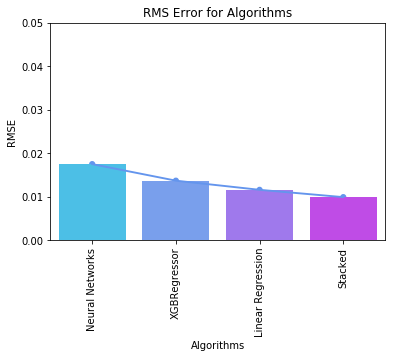

In [26]:
plt.figure()
x = np.array([error_nn, error_xgb, error_lr, error_st])
y = np.array(['Neural Networks','XGBRegressor', 'Linear Regression', 'Stacked'])
dfx = pd.DataFrame(x)
colors = sns.color_palette("cool", len(x))
ax= sns.barplot(y, x, data=dfx,palette=colors)
ax = sns.pointplot(y, x, color='cornflowerblue', scale=0.7)
ax.set(ylim=(0.0, 0.05))
plt.title("RMS Error for Algorithms")
plt.xticks(rotation= 90)
plt.ylabel('RMSE')
plt.xlabel('Algorithms')
#adding the text labels
rects = ax.patches
labels = y

plt.show()